# BA865 B1-Group 09

Ahmed Farid Khan, Aryan Kumar, Shayan Hasan

Here is our Python notebook for training an image classification model on the Glami 1M Dataset.

## Loading Glami-1M Dataset

The first few cells load our GLAMI-1M Dataset. We followed the steps outlined in the following Python Notebook to upload our dataset to the notebook: https://github.com/glami/glami-1m/blob/main/GLAMI_1M_Hands_On_Colab.ipynb

We used only the test dataset and split that into training, test and validation sets since the overall dataset was large and was resulting in computational challenges when we tried working with it.

Here are some example images from the test dataset:

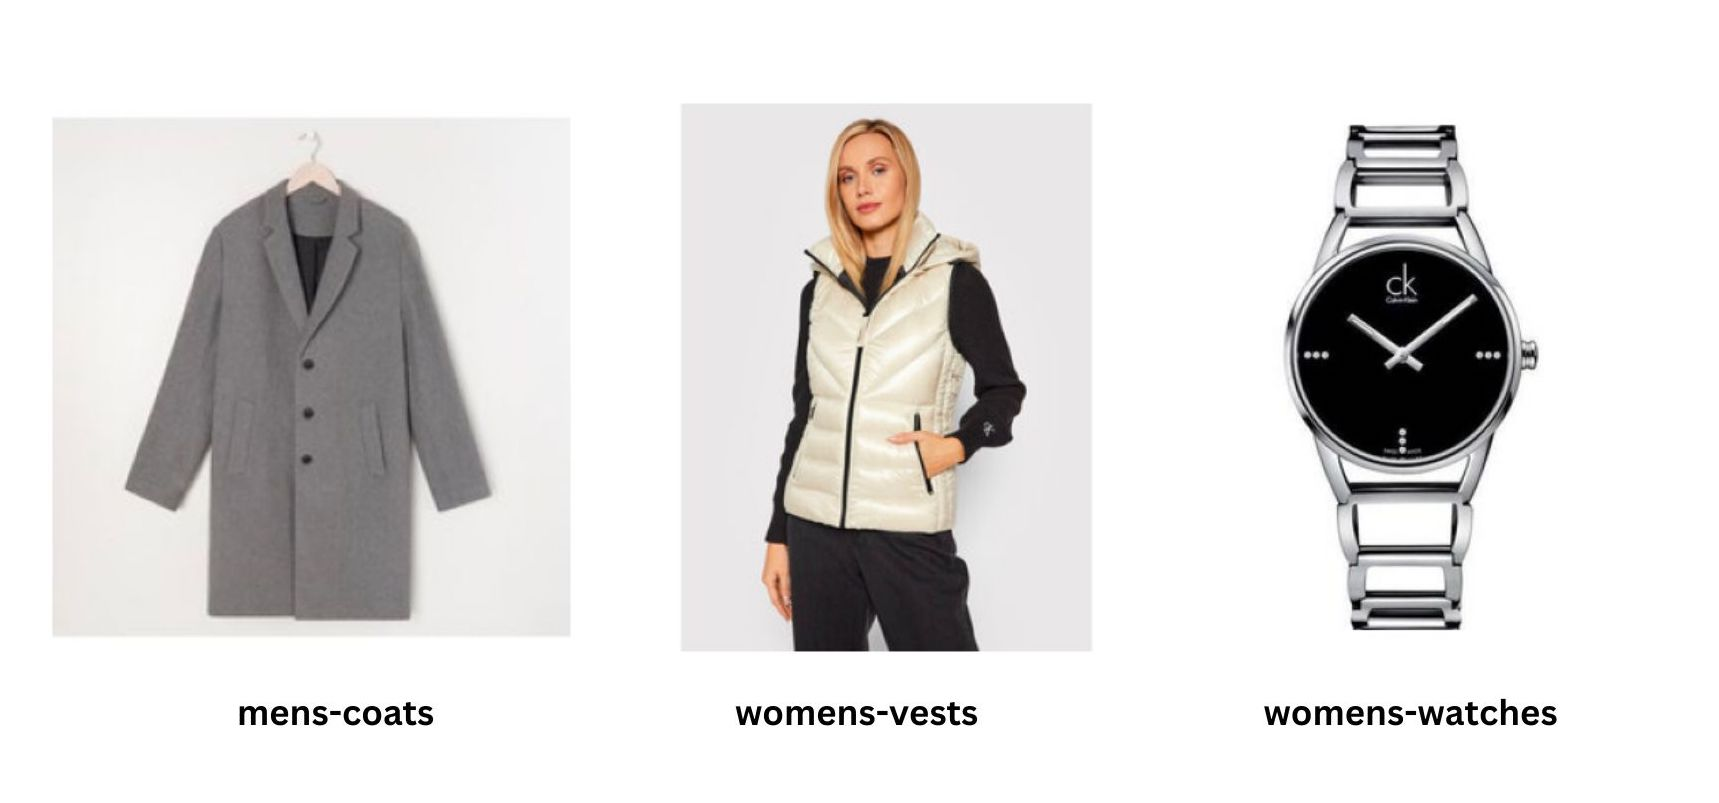

In [ ]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [ ]:
import os

if os.environ.get('original_working_dir') is None:
    os.environ['original_working_dir'] = os.getcwd() + '/'

os.chdir(os.environ['original_working_dir'])
!rm -rf 'glami-1m'
print(os.listdir(os.environ['original_working_dir']))
!git clone https://github.com/glami/glami-1m.git
os.chdir(os.environ['original_working_dir'] + 'glami-1m')

In [ ]:
!pip install -r requirements.txt

In [ ]:
import os
import load_dataset;


os.environ['EXTRACT_DIR'] = "/tmp/GLAMI-1M/"

# For full dataset.
#load_dataset.download_dataset(dataset_url="https://huggingface.co/datasets/glami/glami-1m/resolve/main/GLAMI-1M-dataset.zip")

# Test set only is fast! Download in 30 to 90 seconds!
load_dataset.download_dataset(dataset_url="https://huggingface.co/datasets/glami/glami-1m/resolve/main/GLAMI-1M-dataset--test-only.zip")

Dataset sub directory already exists in the extract dir. Delete it to re-download.


## Data Exploration

In this section, we will explore the dataset, including its columns and what each of them represent.

One important adjustment we will make in this section is the simplification of categories, which we believe will allow us to enhance the accuracy of our image classification problem.

We will also load some images to see what sort of data we are dealing with.

In [ ]:
import load_dataset

df = load_dataset.get_dataframe('test')[['item_id', 'image_id', 'name', 'description', 'category_name', 'image_file']].copy()
df.head(10)

,item_id,image_id,name,description,category_name,image_file
0,62899,60597,DKAREN Dámská souprava Zala,Luxusní saténové negližé Zala Dkaren s okouzlu...,women-s-nightgowns,/tmp/GLAMI-1M/GLAMI-1M-dataset/images/60597.jpg
1,245237,236253,DKAREN Dámska súprava Jola red,Zvodný set topu a táng Jola Dkaren - top s roz...,panties-and-thongs,/tmp/GLAMI-1M/GLAMI-1M-dataset/images/236253.jpg
2,173666,4773,Pepe Jeans dámsky overal Birkeley,Dámsky tmavomodrý overal Birkeley od Pepe Jean...,womens-jumpsuits,/tmp/GLAMI-1M/GLAMI-1M-dataset/images/4773.jpg
3,4822,4773,Pepe Jeans dámský overal Birkeley,Dámský tmavě modrý overal Birkeley od Pepe Jea...,womens-jumpsuits,/tmp/GLAMI-1M/GLAMI-1M-dataset/images/4773.jpg
4,736657,665844,Armani jeans Baloneri HAVANOMA Armani jeans,Armani jeans Baloneri HAVANOMA Bijela Dostupno...,womens-coats,/tmp/GLAMI-1M/GLAMI-1M-dataset/images/665844.jpg
5,813607,665844,Armani jeans Gabardina HAVANOMA Armani jeans,Armani jeans Gabardina HAVANOMA Blanco. Mujer ...,womens-coats,/tmp/GLAMI-1M/GLAMI-1M-dataset/images/665844.jpg
6,4451,4403,Nike tanjun BLACK WHITE,Svršek - textílie Textilní svršky jsou naprost...,mens-sneakers,/tmp/GLAMI-1M/GLAMI-1M-dataset/images/4403.jpg
7,176830,4403,Nike tanjun BLACK WHITE,Vrch - textília Textilné vrchy sú úplne ideáln...,mens-sneakers,/tmp/GLAMI-1M/GLAMI-1M-dataset/images/4403.jpg
8,4837,4788,Pánské tričko Rossli MTP 001 krátký rukáv čern...,Kategorie: Pánské spodní prádlo Typ: Pánská tr...,mens-t-shirts-and-tank-tops,/tmp/GLAMI-1M/GLAMI-1M-dataset/images/4788.jpg
9,172035,44788,Birkenstock Dámske Arizona Eva 36,Obľúbená značka bola založená v roku 1774. Via...,womens-flip-flops,/tmp/GLAMI-1M/GLAMI-1M-dataset/images/44788.jpg


In [ ]:
unique_cat = len(df['category_name'].unique())
unique_cat

191

In [ ]:
df_images = df[['category_name', 'image_file']]
df_images

,category_name,image_file
0,women-s-nightgowns,/tmp/GLAMI-1M/GLAMI-1M-dataset/images/60597.jpg
1,panties-and-thongs,/tmp/GLAMI-1M/GLAMI-1M-dataset/images/236253.jpg
2,womens-jumpsuits,/tmp/GLAMI-1M/GLAMI-1M-dataset/images/4773.jpg
3,womens-jumpsuits,/tmp/GLAMI-1M/GLAMI-1M-dataset/images/4773.jpg
4,womens-coats,/tmp/GLAMI-1M/GLAMI-1M-dataset/images/665844.jpg
...,...,...
115999,womens-headwear,/tmp/GLAMI-1M/GLAMI-1M-dataset/images/44574.jpg
116000,womens-headwear,/tmp/GLAMI-1M/GLAMI-1M-dataset/images/44579.jpg
116001,womens-sunglasses,/tmp/GLAMI-1M/GLAMI-1M-dataset/images/44599.jpg
116002,womens-sunglasses,/tmp/GLAMI-1M/GLAMI-1M-dataset/images/44630.jpg


### Simplifying categorization

The following cells explicity state how we mapped the categories.

In [ ]:
category_map = {
    "Tops": [
        'womens-tops-tank-tops-and-t-shirts', 'mens-t-shirts-and-tank-tops', 'girls-t-shirts-and-shirts',
        'boys-t-shirts', 'womens-blouses-and-shirts', 'mens-shirts', 'womens-sweaters',
        'mens-sweatshirts', 'womens-sweatshirts', 'boys-sweatshirts', 'girls-sweatshirts',
        'womens-vests', 'mens-vests', 'womens-bodysuits', 'womens-tankinis', 'mens-short',
        'boys-tank-tops'
    ],
    "Pants": ['womens-pants', 'mens-pants', 'girls-pants', 'boys-pants', 'womens-denim-jackets',
        'mens-denim-jackets'
    ],
    "Shorts": [
        'womens-skirts', 'girls-skirts', 'womens-shorts', 'boys-shorts', 'girls-shorts',
    ],
    "Dresses": [
        'womens-jumpsuits', 'dresses', 'women-co-ord-sets', 'girls-dresses', 'girls-jump-suits',
    ],
    "Suits": [
        'mens-suit', 'mens-suits', 'womens-suit-jackets-and-blazers','mens-suit-jackets-and-blazers'
    ],
    "Footwear": [
        'mens-sneakers', 'womens-flip-flops', 'girls-shoes', 'womens-outdoor-shoes', 'heels',
        'womens-flats', 'boys-shoes', 'womens-sandals', 'women-dress-shoes', 'womens-sneakers',
        'mens-outdoor-shoes', 'men-dress-shoes', 'womens-boots-and-booties', 'womens-mule',
        'womens-snow-boots', 'baby-shoes', 'womens-espadrilles', 'mens-boots', 'womens-rubber-boots',
        'mens-snow-boots', 'mens-slippers', 'womens-slides'
    ],
    "Outerwear": [
        'womens-coats', 'mens-coats', 'girls-jackets-coats-and-vests', 'boys-jackets-coats-and-vests',
        'womens-parkas', 'mens-parkas', 'womens-bombers', 'mens-bombers', 'womens-quilted-jackets',
        'mens-quilted-jackets', 'womens-windbreakers', 'mens-windbreakers', 'womens-denim-jackets',
        'mens-denim-jackets'
    ],
    "Bags": [
        'mens-bags', 'mens-backpacks', 'womens-backpacks', 'handbags', 'womens-travel-bags',
        'mens-suitcases-and-travel-bags', 'womens-bags-for-laptop', 'shoulder-bags'
    ],
    "Wallets & Small Leather Goods": [
        'mens-wallets', 'womens-wallets', 'womens-keychains', 'mens-keychains'
    ],
    "Belts": [
        'mens-belts', 'womens-belts'
    ],
    "Jewelry": [
        'mens-rings', 'womens-earrings', 'womens-pendants', 'womens-necklaces',
        'mens-cufflinks', 'womens-jewelry-sets', 'mens-bracelets', 'womens-bracelets',
        'womens-rings', 'mens-chains', 'womens-chains', 'womens-fanny-packs'
    ],
    "Headwear": [
        'mens-headwear', 'womens-headwear', 'boys-accessories', 'girls-accessories'
    ],
    "Eyewear": [
        'womens-sunglasses', 'mens-sunglasses', 'mens-eyeglasses', 'womens-eyeglasses'
    ],
    "Scarves & Shawls": [
        'mens-scarves-and-shawls', 'womens-shawls-and-scarves'
    ],
    "Ties & Bow Ties": [
        'mens-ties', 'mens-bow-ties'
    ],
    "Gloves": [
        'mens-gloves', 'womens-gloves'
    ],
    "Umbrellas": [
        'mens-umbrellas', 'womens-umbrellas'
    ],
    "Miscellaneous Accessories": [
        'mens-bath-robes', 'womens-hair-accessories', 'womens-piercing-jewelry',
        'broaches', 'mens-tie-clips'
    ],
    "Undergarments": [
        'panties-and-thongs', 'mens-undergarments', 'corsets-and-garter-belts', 'womens-bras',
        'underwear-sets', 'girls-undergarments', 'boys-undergarments'
    ],
    "Swimwear": [
        'bikinis', 'one-piece-swimsuits', 'mens-swimwear', 'boys-swimwear', 'girls-swimwear'
    ],
    "Nightwear": [
        'women-s-nightgowns', 'womens-pajamas', 'boys-sleepwear', 'girls-sleepwear', 'mens-sleepwear'
    ],
    "Sportswear": [
        'womens-sport-jackets', 'mens-sport-jackets', 'sport-and-outdoor', 'womens-tracksuits',
        'mens-tracksuits', 'womens-socks', 'mens-football-shoes'
    ],
    "Baby & Kids' Clothing": [
        'baby-clothing', 'baby-shoes', 'baby-accessories', 'kids-room', 'kids-cosmetics'
    ],
    "Home & Living": [
        'bed-linen', 'decor', 'kitchen', 'bathroom', 'living-room', 'bedroom', 'office', 'garden'
    ],
    "Specialty Clothing": [
        'islamic-clothing'
    ],
    "Cosmetics & Personal Care": [
        'women-s-cosmetics', 'mens-cosmetics', 'cosmetic-tools-brushes', 'women-face-masks', 'men-face-masks'
    ],
    "Footwear Accessories": [
        'womens-shoe-laces', 'mens-shoe-laces', 'womens-shoe-care', 'mens-shoe-care'
    ]
}

In [ ]:
# Flatten the mapping to account for sub categories
flat_category_map = {}
for broad_category, specific_categories in category_map.items():
    for specific_category in specific_categories:
        flat_category_map[specific_category] = broad_category

# Define a function and apply to all categories
def map_category(old_category):
    return flat_category_map.get(old_category, "Other")

df_images['broad_category'] = df_images['category_name'].apply(map_category)

# Show the result
df_images

/scratch/6850574.1.academic-gpu/ipykernel_1748284/3455109530.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_images['broad_category'] = df_images['category_name'].apply(map_category)


,category_name,image_file,broad_category
0,women-s-nightgowns,/tmp/GLAMI-1M/GLAMI-1M-dataset/images/60597.jpg,Nightwear
1,panties-and-thongs,/tmp/GLAMI-1M/GLAMI-1M-dataset/images/236253.jpg,Undergarments
2,womens-jumpsuits,/tmp/GLAMI-1M/GLAMI-1M-dataset/images/4773.jpg,Dresses
3,womens-jumpsuits,/tmp/GLAMI-1M/GLAMI-1M-dataset/images/4773.jpg,Dresses
4,womens-coats,/tmp/GLAMI-1M/GLAMI-1M-dataset/images/665844.jpg,Outerwear
...,...,...,...
115999,womens-headwear,/tmp/GLAMI-1M/GLAMI-1M-dataset/images/44574.jpg,Headwear
116000,womens-headwear,/tmp/GLAMI-1M/GLAMI-1M-dataset/images/44579.jpg,Headwear
116001,womens-sunglasses,/tmp/GLAMI-1M/GLAMI-1M-dataset/images/44599.jpg,Eyewear
116002,womens-sunglasses,/tmp/GLAMI-1M/GLAMI-1M-dataset/images/44630.jpg,Eyewear


In [ ]:
df_images.broad_category.nunique()

28

### Sample check

In the following cells, we converted image filepaths into image files to understand the nature of the images that we have in the dataset. We print out the initial categories and broad categories next to them to give an understanding of how both correspond to the generated images.

In [ ]:
sample_demo = df_images.sample(10, random_state = 42)
sample_demo.shape

(10, 3)

In [ ]:
#!pip install torchvision

In [ ]:
import torch
import torchvision
from torchvision.io import read_image
import torchvision.transforms as T

In [ ]:
# Define a function to read and convert images to tensors
def read_image_to_tensor(file_path):
    img = read_image(file_path)
    return img

# Apply the function to each file path in the 'image_file' column
sample_demo['image_tensor'] = sample_demo['image_file'].apply(read_image_to_tensor)

sample_demo.head()

,category_name,image_file,broad_category,image_tensor
81411,mens-coats,/tmp/GLAMI-1M/GLAMI-1M-dataset/images/798127.jpg,Outerwear,"[[[tensor(255, dtype=torch.uint8), tensor(255,..."
107778,womens-watches,/tmp/GLAMI-1M/GLAMI-1M-dataset/images/921953.jpg,Other,"[[[tensor(255, dtype=torch.uint8), tensor(255,..."
67599,womens-vests,/tmp/GLAMI-1M/GLAMI-1M-dataset/images/689134.jpg,Tops,"[[[tensor(255, dtype=torch.uint8), tensor(254,..."
27403,boys-sweatshirts,/tmp/GLAMI-1M/GLAMI-1M-dataset/images/26798.jpg,Tops,"[[[tensor(255, dtype=torch.uint8), tensor(255,..."
91604,mens-t-shirts-and-tank-tops,/tmp/GLAMI-1M/GLAMI-1M-dataset/images/288470.jpg,Tops,"[[[tensor(255, dtype=torch.uint8), tensor(255,..."


In [ ]:
sample_demo['image_tensor']

81411     [[[tensor(255, dtype=torch.uint8), tensor(255,...
107778    [[[tensor(255, dtype=torch.uint8), tensor(255,...
67599     [[[tensor(255, dtype=torch.uint8), tensor(254,...
27403     [[[tensor(255, dtype=torch.uint8), tensor(255,...
91604     [[[tensor(255, dtype=torch.uint8), tensor(255,...
94685     [[[tensor(255, dtype=torch.uint8), tensor(255,...
49435     [[[tensor(255, dtype=torch.uint8), tensor(255,...
42724     [[[tensor(255, dtype=torch.uint8), tensor(255,...
108874    [[[tensor(255, dtype=torch.uint8), tensor(255,...
13659     [[[tensor(255, dtype=torch.uint8), tensor(255,...
Name: image_tensor, dtype: object

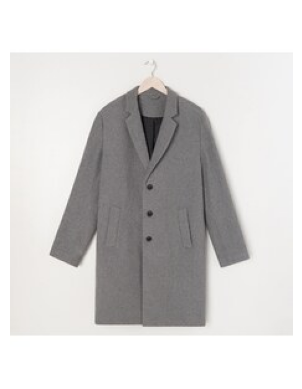

mens-coats  /  Outerwear


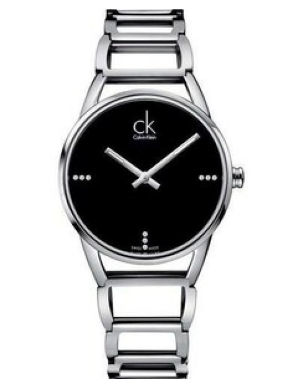

womens-watches  /  Other


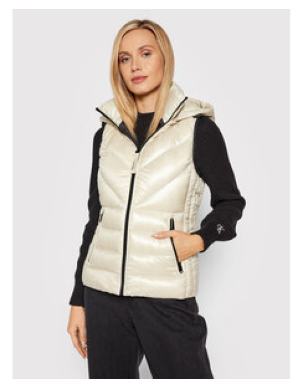

womens-vests  /  Tops


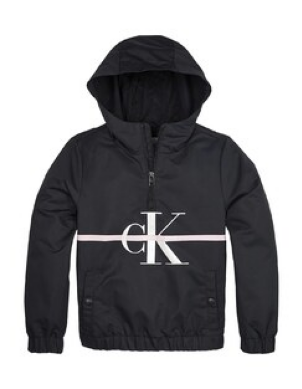

boys-sweatshirts  /  Tops


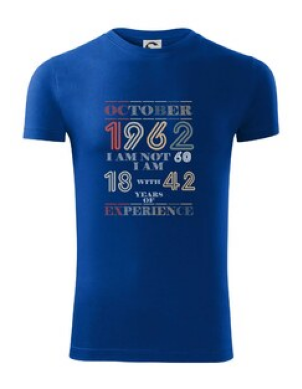

mens-t-shirts-and-tank-tops  /  Tops


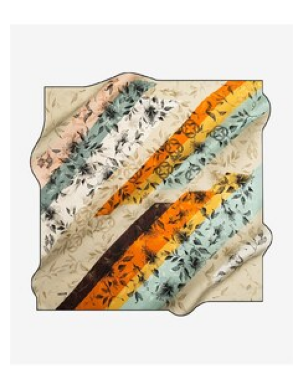

islamic-clothing  /  Specialty Clothing


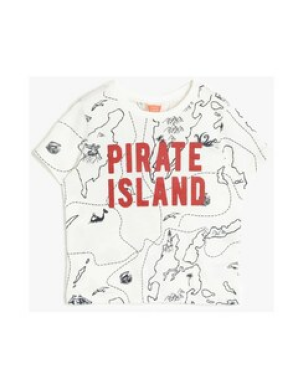

baby-clothing  /  Baby & Kids' Clothing


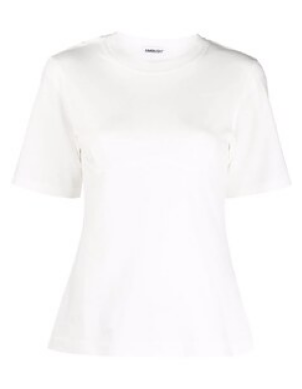

womens-tops-tank-tops-and-t-shirts  /  Tops


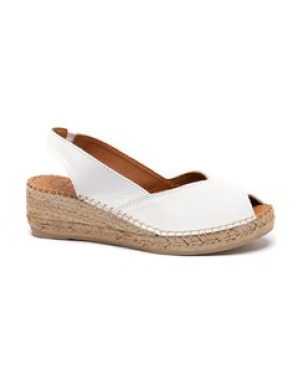

womens-sandals  /  Footwear


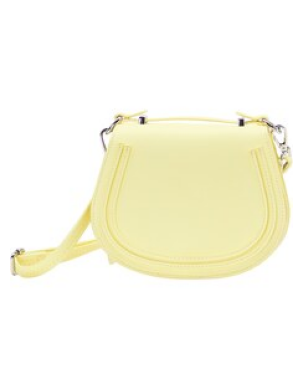

shoulder-bags  /  Bags


In [ ]:
import matplotlib.pyplot as plt

def show_image(tensor):
    plt.imshow(tensor.permute(1, 2, 0).numpy())
    plt.axis('off')
    plt.show()

# Display the first image tensor as an image
for x in range(10):
  show_image(sample_demo.iloc[x]['image_tensor'])
  print(sample_demo.iloc[x]['category_name'], " / ", sample_demo.iloc[x]['broad_category'])

## MLP / CNN / Random Forest

Here we will preprocess the data for and run our MLP, CNN and Random Forest models. We will process the data for ViT separately since it is a pretrained model and required the input into the model to be in a different format.

### Preprocessing

#### Creating embeddings for CNN, MLP and Random Forest

Here we use the read_image_to_tensor function to create tensor embeddings for all of our images.

In [ ]:
# Apply the function to each file path in the 'image_file' column
df_images['image_tensor'] = df_images['image_file'].apply(read_image_to_tensor)

/scratch/6850574.1.academic-gpu/ipykernel_1748284/3880466772.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_images['image_tensor'] = df_images['image_file'].apply(read_image_to_tensor)


In [ ]:
# Display the updated DataFrame
df_images.head()

,category_name,image_file,broad_category,image_tensor
0,women-s-nightgowns,/tmp/GLAMI-1M/GLAMI-1M-dataset/images/60597.jpg,Nightwear,"[[[tensor(255, dtype=torch.uint8), tensor(255,..."
1,panties-and-thongs,/tmp/GLAMI-1M/GLAMI-1M-dataset/images/236253.jpg,Undergarments,"[[[tensor(255, dtype=torch.uint8), tensor(255,..."
2,womens-jumpsuits,/tmp/GLAMI-1M/GLAMI-1M-dataset/images/4773.jpg,Dresses,"[[[tensor(255, dtype=torch.uint8), tensor(255,..."
3,womens-jumpsuits,/tmp/GLAMI-1M/GLAMI-1M-dataset/images/4773.jpg,Dresses,"[[[tensor(255, dtype=torch.uint8), tensor(255,..."
4,womens-coats,/tmp/GLAMI-1M/GLAMI-1M-dataset/images/665844.jpg,Outerwear,"[[[tensor(255, dtype=torch.uint8), tensor(255,..."


In [ ]:
df_images['image_tensor'].shape

(116004,)

In [ ]:
df_images.iloc[0]['image_tensor'].shape

torch.Size([3, 298, 228])

#### Train Test Validation Split

We split the dataset into train, validation and test sets (75-15-10)

In [ ]:
X = df_images['image_tensor']
y = df_images['broad_category']

from sklearn.model_selection import train_test_split

train_ratio = 0.75
validation_ratio = 0.15
test_ratio = 0.10

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1 - train_ratio)

X_valid, X_test, y_valid, y_test = train_test_split(X_test, y_test, test_size=test_ratio/(test_ratio + validation_ratio))

print(X_train.shape, X_valid.shape, X_test.shape)

(87003,) (17400,) (11601,)


#### Data Loader

Here we store the tensors and the relevant labels in a dataloader for our data split.

In [ ]:
from torch.utils.data import Dataset, DataLoader
from torchvision.transforms import Compose, Resize, ToTensor, ToPILImage, Lambda
from PIL import Image

class CustomImageTensorDataset(Dataset):
    def __init__(self, tensors, labels, output_size=(298, 228)):
        self.tensors = tensors
        self.labels = labels
        self.transform = Compose([
            ToPILImage(),
            Resize(output_size),  # Resize all images to the same size
            Lambda(lambda x: x.convert('RGB') if x.mode != 'RGB' else x),  # Ensure image is RGB
            ToTensor(),
            Lambda(lambda x: x.float() / 255),  # Normalize pixel values to [0, 1]
        ])

    def __len__(self):
        return len(self.tensors)

    def __getitem__(self, index):
        x = self.tensors[index]
        y = self.labels[index]

        # Apply transformations
        x = self.transform(x)

        return x, y

In [ ]:
from torch.utils.data import Dataset, DataLoader

from torchvision.transforms import Compose, Resize, ToTensor, Grayscale, ToPILImage, Lambda

class CustomImageTensorDataset(Dataset):
    def __init__(self, tensors, labels, output_size=(298, 228)):
        self.tensors = tensors
        self.labels = labels
        self.transform = Compose([
            ToPILImage(),
            Resize(output_size),  # Resize all images to the same size
            Grayscale(num_output_channels=1),  # Convert images to grayscale
            ToTensor(),
            Lambda(lambda x: x.float() / 255),  # Normalize pixel values to [0, 1]
        ])

    def __len__(self):
        return len(self.tensors)

    def __getitem__(self, index):
        x = self.tensors[index]
        y = self.labels[index]

        # Apply transformations
        x = self.transform(x)

        return x, y

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Assume y_train is a list of string labels
label_encoder = LabelEncoder()
#y_train_indices = label_encoder.fit_transform(sample_y_train)
y_train_indices = label_encoder.fit_transform(y_train)

# Convert labels to tensors
y_train_tensors = torch.tensor(y_train_indices.tolist(), dtype=torch.long)

# Create the dataset directly with the list of tensors and labels
#train_dataset = CustomImageTensorDataset(sample_X_train.tolist(), y_train_tensors)
train_dataset = CustomImageTensorDataset(X_train.tolist(), y_train_tensors)

# Use the DataLoader to handle batching and shuffling
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Assume y_valid is a list of string labels
label_encoder = LabelEncoder()
#y_valid_indices = label_encoder.fit_transform(sample_y_valid)
y_valid_indices = label_encoder.fit_transform(y_valid)

# Convert labels to tensors
y_valid_tensors = torch.tensor(y_valid_indices.tolist(), dtype=torch.long)

# Create the dataset directly with the list of tensors and labels
#valid_dataset = CustomImageTensorDataset(sample_X_valid.tolist(), y_valid_tensors)
valid_dataset = CustomImageTensorDataset(X_valid.tolist(), y_valid_tensors)

# Use the DataLoader to handle batching and shuffling
valid_loader = DataLoader(valid_dataset, batch_size=64, shuffle=True)

In [ ]:
# Assume y_test is a list of string labels
label_encoder = LabelEncoder()
#y_test_indices = label_encoder.fit_transform(sample_y_test)
y_test_indices = label_encoder.fit_transform(y_test)

# Convert labels to tensors
y_test_tensors = torch.tensor(y_test_indices.tolist(), dtype=torch.long)

# Create the dataset directly with the list of tensors and labels
#test_dataset = CustomImageTensorDataset(sample_X_test.tolist(), y_test_tensors)
test_dataset = CustomImageTensorDataset(X_test.tolist(), y_test_tensors)

# Use the DataLoader to handle batching and shuffling
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False)

In [ ]:
test_dataset

### Random Forest Classifier

In [ ]:
import numpy as np
import pandas as pd
import torch
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import LabelEncoder

# Function to flatten tensors and convert to numpy arrays
def flatten_and_convert(tensors):
    flattened_arrays = []
    for tensor in tensors:
        array = tensor.numpy().flatten()
        flattened_arrays.append(array)
    return np.array(flattened_arrays, dtype=object)


X_train_tensors = X_train.apply(lambda x: x[0][0])
X_test_tensors = X_test.apply(lambda x: x[0][0])


X_train_np = flatten_and_convert(X_train_tensors)
X_test_np = flatten_and_convert(X_test_tensors)

# Since RandomForest cannot handle varying lengths or object dtype, we need to pad or truncate
# Here's how you could pad them to the same length (find the max length first)
# Used ChatGPT here
max_len = max(max([len(x) for x in X_train_np]), max([len(x) for x in X_test_np]))
X_train_np = np.array([np.pad(x, (0, max_len - len(x)), mode='constant', constant_values=0) for x in X_train_np])
X_test_np = np.array([np.pad(x, (0, max_len - len(x)), mode='constant', constant_values=0) for x in X_test_np])

label_encoder = LabelEncoder()
y_train_np = label_encoder.fit_transform(y_train)
y_test_np = label_encoder.transform(y_test)

# Used this to debug the code as it was not working before
def print_debug_info(var, var_name):
    print(f"{var_name} - Type: {type(var)}, Shape: {var.shape}")

print_debug_info(X_train_np, 'X_train_np')
print_debug_info(X_test_np, 'X_test_np')
print_debug_info(y_train_np, 'y_train_np')
print_debug_info(y_test_np, 'y_test_np')


rf_classifier = RandomForestClassifier(criterion='entropy', max_depth=50, n_estimators=100, random_state=42)
rf_classifier.fit(X_train_np, y_train_np)


y_pred = rf_classifier.predict(X_test_np)

accuracy = accuracy_score(y_test_np, y_pred)
print("Accuracy:", accuracy)
print("Classification Report:\n", classification_report(y_test_np, y_pred))

X_train_np - Type: <class 'numpy.ndarray'>, Shape: (87003, 228)
X_test_np - Type: <class 'numpy.ndarray'>, Shape: (11601, 228)
y_train_np - Type: <class 'numpy.ndarray'>, Shape: (87003,)
y_test_np - Type: <class 'numpy.ndarray'>, Shape: (11601,)
Accuracy: 0.38048444099646583
Classification Report:
               precision    recall  f1-score   support

           0       0.53      0.14      0.22       591
           1       0.44      0.07      0.12       391
           2       1.00      0.05      0.10        19
           3       1.00      0.06      0.11        68
           4       0.47      0.30      0.37       463
           5       1.00      0.01      0.02        90
           6       0.30      0.95      0.45      2261
           7       0.00      0.00      0.00        12
           8       1.00      0.05      0.09        22
           9       0.50      0.04      0.07       139
          10       0.67      0.01      0.03       287
          11       0.75      0.11      0.19       3

/share/pkg.8/python3/3.10.12/install/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/share/pkg.8/python3/3.10.12/install/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/share/pkg.8/python3/3.10.12/install/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start,

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, accuracy_score

# Define the model
rf = RandomForestClassifier(random_state=42)

# Define the parameters grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 50, 100, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

scorer = make_scorer(accuracy_score)

grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, scoring=scorer, cv=3, verbose=2, n_jobs=-1)

grid_search.fit(X_train_np, y_train_np)

print("Best parameters found: ", grid_search.best_params_)
print("Best accuracy found: ", grid_search.best_score_)

Fitting 3 folds for each of 108 candidates, totalling 324 fits
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=  39.4s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=5, n_estimators=300; total time=  55.9s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=10, n_estimators=300; total time=  55.8s
[CV] END max_depth=10, min_samples_leaf=2, min_samples_split=5, n_estimators=100; total time=  19.3s
[CV] END max_depth=10, min_samples_leaf=2, min_samples_split=5, n_estimators=200; total time=  39.4s
[CV] END max_depth=10, min_samples_leaf=2, min_samples_split=10, n_estimators=200; total time=  41.4s
[CV] END max_depth=10, min_samples_leaf=4, min_samples_split=2, n_estimators=200; total time=  40.2s
[CV] END max_depth=10, min_samples_leaf=4, min_samples_split=5, n_estimators=100; total time=  20.0s
[CV] END max_depth=10, min_samples_leaf=4, min_samples_split=5, n_estimators=300; total time=  58.6s
[CV] END max_depth=50, min

/Users/shayanhasan28/anaconda3/lib/python3.11/site-packages/joblib/externals/loky/process_executor.py:700: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=  39.0s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=  19.1s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=10, n_estimators=100; total time=  18.6s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=10, n_estimators=100; total time=  18.4s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=10, n_estimators=300; total time=  56.0s
[CV] END max_depth=10, min_samples_leaf=2, min_samples_split=5, n_estimators=100; total time=  19.7s
[CV] END max_depth=10, min_samples_leaf=2, min_samples_split=5, n_estimators=300; total time=  60.0s
[CV] END max_depth=10, min_samples_leaf=4, min_samples_split=2, n_estimators=100; total time=  20.9s
[CV] END max_depth=10, min_samples_leaf=4, min_samples_split=2, n_estimators=200; total time=  40.2s
[CV] END max_depth=10, min_samples_leaf=4, min_samples_split=5, n_estimators=200; total 

### MLP

In [ ]:
# Hyperparameters

#experiment_name = "Experiment_MLP"

# Data
img_dimensions = (3,298,228)
input_size = 3 * 298 * 228
output_size = 28
#batch_size = 128

# MLP
hidden_size_1 = 2048
hidden_size_2 = 1024

#Optimzation
learning_rate = 0.001
epochs = 10
weight_decay = 0.001

In [ ]:
!pip install wandb

In [ ]:
import wandb
wandb.login()

Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.
wandb: Currently logged in as: ahmedfk (ahmedfkbu). Use `wandb login --relogin` to force relogin


True

In [ ]:
wandb.init(
    # Set the project where this run will be logged
    project="BA865 Group Project Team 3",
    # We pass a run name (otherwise it’ll be randomly assigned, like sunshine-lollypop-10)
    name="mlp_tracking_rgb",
    # Track hyperparameters and run metadata
    config={
    "learning_rate": learning_rate,
    "epochs": epochs,
    "weight_decay": weight_decay,
    "notes for me": "This is where the losses and accuracies from the MLP are tracked"
    })

In [ ]:
gpu_available = torch.cuda.is_available()
gpu_available

True

In [ ]:
use_gpu = True

In [ ]:
import torch.nn as nn

class MLP(nn.Module):
    def __init__(self, input_size, hidden_size_1, hidden_size_2, output_size):
        super(MLP, self).__init__()
        self.input_size = input_size
        self.fc1 = nn.Linear(input_size, hidden_size_1)
        self.relu1 = nn.ReLU()
        self.fc2 = nn.Linear(hidden_size_1, hidden_size_2)
        self.relu2 = nn.ReLU()
        self.fc3 = nn.Linear(hidden_size_2, output_size)

    def forward(self, x):
        x = x.view(-1, self.input_size)
        x = self.fc1(x)
        x = self.relu1(x)
        x = self.fc2(x)
        x = self.relu2(x)
        x = self.fc3(x)
        return x

In [ ]:
MLP_model = MLP(input_size, hidden_size_1, hidden_size_2, output_size)
if gpu_available and use_gpu:
  model = MLP_model.cuda()

In [ ]:
from torchinfo import summary
summary(MLP_model, (3, 298, 228))

Layer (type:depth-idx)                   Output Shape              Param #
MLP                                      [1, 28]                   --
├─Linear: 1-1                            [1, 2048]                 417,449,984
├─ReLU: 1-2                              [1, 2048]                 --
├─Linear: 1-3                            [1, 1024]                 2,098,176
├─ReLU: 1-4                              [1, 1024]                 --
├─Linear: 1-5                            [1, 28]                   28,700
Total params: 419,576,860
Trainable params: 419,576,860
Non-trainable params: 0
Total mult-adds (M): 419.58
Input size (MB): 0.82
Forward/backward pass size (MB): 0.02
Params size (MB): 1678.31
Estimated Total Size (MB): 1679.15

In [ ]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(MLP_model.parameters(), lr=learning_rate, weight_decay=weight_decay)

In [ ]:
def get_accuracy(dataloader, model):
  acc = 0

  with torch.no_grad():
      for images, labels in dataloader:
          if gpu_available and use_gpu:
            images = images.cuda()
            labels = labels.cuda()

          outputs = model(images)

          # Update accuracy for this batch
          acc = acc + torch.sum(torch.argmax(outputs, axis=1) == labels)

      # Compute the accuracy
      acc = acc/len(dataloader.dataset)

      return acc

In [ ]:
def get_loss(loader):
  with torch.no_grad():

    loss = 0
    for i, (images, labels) in enumerate(loader):
          # To make sure the model is on cuda too
          if gpu_available and use_gpu:
            images = images.cuda()
            labels = labels.cuda()

          # Forward pass
          outputs = model(images)

          # Calculate the loss.
          loss = loss + criterion(outputs, labels)
    return loss/ len(loader.dataset)

In [ ]:
class EarlyStopper:
    def __init__(self, patience=1):
        self.patience = patience
        self.counter = 0
        self.min_validation_loss = float('inf')

    def early_stop(self, validation_loss):
        # If the new loss is lower than the old loss, reset the counter
        if validation_loss < self.min_validation_loss:
            self.min_validation_loss = validation_loss
            self.counter = 0
            # Keep track of the best model by saving it on the hard drive
            torch.save(model.state_dict(), "./best_model.pt")
        # Otherwise, increment the counter.
        elif validation_loss > self.min_validation_loss:
            self.counter += 1
            # Terminate if too many epoch with high loss
            if self.counter >= self.patience:
                return True
        return False

In [ ]:
early_stopper = EarlyStopper(patience=3)

# Training loop
for epoch in range(epochs): # The epochs.
    for i, (images, labels) in enumerate(train_loader): # The batches.
        # step 1: Zero out the gradients.
        optimizer.zero_grad()

        # step 1.1 move data to cuda. Make sure the model is on cuda too!
        #if gpu_available and use_gpu:
         # images = images.cuda()
          #labels = labels.cuda()

        if gpu_available and use_gpu:
            images = images.view(images.size(0), -1).cuda()  # Reshape and move images to GPU
            labels = labels.cuda()

        # step2: Forward pass
        outputs = MLP_model(images)

        # step 3: calculate the loss.
        loss = criterion(outputs, labels)

        # step 4: Backward pass
        loss.backward()
        optimizer.step()

        # Print the loss
        if i %100 == 0:
            print("Epoch", epoch+ 1, " batch", i+1, ". Training Loss: ", loss.item())
          #if enable_wandb:
            wandb.log({"epoch": epoch+1, "batch": i+1, "training loss": loss})

    # Compute total train accuracy
    train_acc = get_accuracy(train_loader, MLP_model)
    test_acc = get_accuracy(test_loader, MLP_model)

    print(f'Epoch [{epoch + 1}/{epochs}], Train Accuracy: {train_acc.item():.4f}, Test Accuracy: {test_acc.item():.4f}')
    #if enable_wandb:
    wandb.log({"epoch": epoch + 1, "train_accuracy": train_acc.item(), "test_accuracy": test_acc.item()})

    test_loss = get_loss(test_loader)
    if early_stopper.early_stop(test_loss):
        print("Test loss hasn't dropped. Early stopping!")
        break

Epoch 1  batch 1 . Training Loss:  3.3265371322631836
Epoch 1  batch 101 . Training Loss:  2.4075818061828613
Epoch 1  batch 201 . Training Loss:  1.9521024227142334
Epoch 1  batch 301 . Training Loss:  2.0526318550109863
Epoch 1  batch 401 . Training Loss:  2.0476794242858887
Epoch 1  batch 501 . Training Loss:  2.2553868293762207
Epoch 1  batch 601 . Training Loss:  1.995192050933838
Epoch 1  batch 701 . Training Loss:  2.3877925872802734
Epoch 1  batch 801 . Training Loss:  1.8704415559768677
Epoch 1  batch 901 . Training Loss:  2.214749336242676
Epoch 1  batch 1001 . Training Loss:  2.031796455383301
Epoch 1  batch 1101 . Training Loss:  2.077434539794922
Epoch 1  batch 1201 . Training Loss:  2.1337432861328125
Epoch 1  batch 1301 . Training Loss:  2.558866500854492
Epoch [1/10], Train Accuracy: 0.3922, Test Accuracy: 0.3992
Epoch 2  batch 1 . Training Loss:  2.1266655921936035
Epoch 2  batch 101 . Training Loss:  1.8331011533737183
Epoch 2  batch 201 . Training Loss:  1.8619543313

### CNN

In [ ]:
wandb.init(
    # Set the project where this run will be logged
    project="BA865 Group Project Team 3",
    # We pass a run name (otherwise it’ll be randomly assigned, like sunshine-lollypop-10)
    name="cnn_tracking-rgb",
    # Track hyperparameters and run metadata
    config={
    "learning_rate": learning_rate,
    "epochs": epochs,
    "weight_decay": weight_decay,
    "notes for me": "This is where the losses and accuracies from the CNN are tracked"
    })

In [ ]:
# CNN model
class CNN(nn.Module):
    def __init__(self, output_size):
        super(CNN, self).__init__()
        self.model = nn.Sequential(

            torch.nn.Conv2d(img_dimensions[0], 16, 3, stride=2, padding=1),
            torch.nn.ReLU(),
            torch.nn.MaxPool2d(2),
            torch.nn.BatchNorm2d(16),

            torch.nn.Conv2d(16, 32, 3, stride=2, padding=1),
            torch.nn.ReLU(),
            torch.nn.MaxPool2d(2),
            torch.nn.BatchNorm2d(32),

            torch.nn.Conv2d(32, 64, 3, stride=2, padding=1),
            torch.nn.ReLU(),
            torch.nn.MaxPool2d(2),
            torch.nn.BatchNorm2d(64),

            torch.nn.Conv2d(64, 128, 5, stride=3, padding=1),
            torch.nn.ReLU(),

            nn.AdaptiveAvgPool2d((1, 1)),
            nn.Flatten(),
            nn.Linear(128, output_size) # We can determine the 72 here by doing calculations offline or looking at the error.
        )

    # Defines the forward pass.
    def forward(self, x):
        x = x.view(-1, img_dimensions[0], img_dimensions[1], img_dimensions[2])
        return self.model(x)

In [ ]:
CNN_model = CNN(output_size)
if gpu_available and use_gpu:
  model = CNN_model.cuda()

In [ ]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(CNN_model.parameters(), lr=learning_rate, weight_decay=weight_decay)

In [ ]:
early_stopper = EarlyStopper(patience=3)

# Training loop
for epoch in range(epochs): # The epochs.
    for i, (images, labels) in enumerate(train_loader): # The batches.
        # step 1: Zero out the gradients.
        optimizer.zero_grad()

        # step 1.1 move data and model to cuda
        if gpu_available and use_gpu:
            images = images.view(images.size(0), -1).cuda()  # Reshape and move images to GPU
            labels = labels.cuda()

        # step2: Forward pass
        outputs = CNN_model(images)

        # step 3: calculate the loss.
        loss = criterion(outputs, labels)

        # step 4: Backward pass
        loss.backward()
        optimizer.step()

        # Print the loss
        if i %100 == 0:
          print("Epoch", epoch+ 1, " batch", i+1, ". Training Loss: ", loss.item())
          #if enable_wandb:
          wandb.log({"epoch": epoch+1, "batch": i+1, "training loss": loss})

    # Compute total train accuracy
    train_acc = get_accuracy(train_loader, CNN_model)
    valid_acc = get_accuracy(valid_loader, CNN_model)

    print(f'Epoch [{epoch + 1}/{epochs}], Train Accuracy: {train_acc.item():.4f}, Validation Accuracy: {valid_acc.item():.4f}')
    #if enable_wandb:
    wandb.log({"epoch": epoch + 1, "train_accuracy": train_acc.item(), "validation_accuracy": valid_acc.item()})

    valid_loss = get_loss(valid_loader)
    if early_stopper.early_stop(valid_loss):
        print("Valid loss hasn't dropped. Early stopping!")
        break

Epoch 1  batch 1 . Training Loss:  3.336984634399414
Epoch 1  batch 101 . Training Loss:  1.6097376346588135
Epoch 1  batch 201 . Training Loss:  1.6963717937469482
Epoch 1  batch 301 . Training Loss:  1.4379197359085083
Epoch 1  batch 401 . Training Loss:  1.2107150554656982
Epoch 1  batch 501 . Training Loss:  1.2185417413711548
Epoch 1  batch 601 . Training Loss:  1.021091103553772
Epoch 1  batch 701 . Training Loss:  1.2486652135849
Epoch 1  batch 801 . Training Loss:  1.1783075332641602
Epoch 1  batch 901 . Training Loss:  1.1876097917556763
Epoch 1  batch 1001 . Training Loss:  1.0106743574142456
Epoch 1  batch 1101 . Training Loss:  1.25791597366333
Epoch 1  batch 1201 . Training Loss:  1.3742953538894653
Epoch 1  batch 1301 . Training Loss:  1.1090080738067627
Epoch [1/10], Train Accuracy: 0.6557, Validation Accuracy: 0.6338
Epoch 2  batch 1 . Training Loss:  0.7803236246109009
Epoch 2  batch 101 . Training Loss:  1.1463534832000732
Epoch 2  batch 201 . Training Loss:  1.441931

In [ ]:
CNN_model.eval()
test_accuracy = get_accuracy(test_loader, CNN_model)
print('test accuracy is {:.2f}'.format(test_accuracy * 100), "%")

test accuracy is 70.57 %


## ViT Transformer (Hugging Face)

In this section, we will preprocess the data for and train the ViT Transformer for our model. Since this is a pre-trained model that we have fine-tuned for our specific problems, it required the inputs to the model in a slightly different manner when compared with the models we trained ourselves. The following cells highlight the process to update the weights and biases for the model to run accurately. It achieved the highest accuracy of 85%.

### Data preprocessing for ViT

In [ ]:
from PIL import Image
import torchvision.transforms as T

def process_image_to_pil(image_path):
    # Open the image file
    image = Image.open(image_path)

    # Convert grayscale images to RGB if they are not already
    if image.mode != 'RGB':
        image = image.convert('RGB')

    # Resize the image
    resize_transform = T.Resize((224, 224))
    image = resize_transform(image)

    return image

In [ ]:
# Apply the function to each image path in the DataFrame
df_images['processed_pil_image'] = df_images['image_file'].apply(process_image_to_pil)

/scratch/6850574.1.academic-gpu/ipykernel_1326672/2637033354.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_images['processed_pil_image'] = df_images['image_file'].apply(process_image_to_pil)


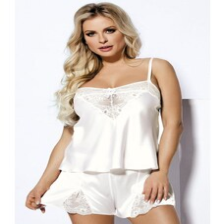

In [ ]:
df_images['processed_pil_image'][0]

In [ ]:
from transformers import ViTImageProcessor

model_name_or_path = 'google/vit-base-patch16-224-in21k'
processor = ViTImageProcessor.from_pretrained(model_name_or_path)

2024-04-25 19:25:53.982590: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-04-25 19:25:56.891599: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-04-25 19:26:10.217037: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [ ]:
print(processor)

ViTImageProcessor {
  "_valid_processor_keys": [
    "images",
    "do_resize",
    "size",
    "resample",
    "do_rescale",
    "rescale_factor",
    "do_normalize",
    "image_mean",
    "image_std",
    "return_tensors",
    "data_format",
    "input_data_format"
  ],
  "do_normalize": true,
  "do_rescale": true,
  "do_resize": true,
  "image_mean": [
    0.5,
    0.5,
    0.5
  ],
  "image_processor_type": "ViTImageProcessor",
  "image_std": [
    0.5,
    0.5,
    0.5
  ],
  "resample": 2,
  "rescale_factor": 0.00392156862745098,
  "size": {
    "height": 224,
    "width": 224
  }
}



In [ ]:
def process_example(image_tensor, label):
    inputs = processor(image_tensor, return_tensors='pt')
    inputs['labels'] = label
    return inputs

In [ ]:
process_example(df_images['processed_pil_image'][0], df_images['broad_category'][0])

{'pixel_values': tensor([[[[1.0000, 1.0000, 1.0000,  ..., 1.0000, 1.0000, 1.0000],
          [1.0000, 1.0000, 1.0000,  ..., 1.0000, 1.0000, 1.0000],
          [1.0000, 1.0000, 1.0000,  ..., 1.0000, 1.0000, 1.0000],
          ...,
          [1.0000, 1.0000, 1.0000,  ..., 1.0000, 1.0000, 1.0000],
          [1.0000, 1.0000, 1.0000,  ..., 1.0000, 1.0000, 1.0000],
          [1.0000, 1.0000, 1.0000,  ..., 1.0000, 1.0000, 1.0000]],

         [[1.0000, 1.0000, 1.0000,  ..., 1.0000, 1.0000, 1.0000],
          [1.0000, 1.0000, 1.0000,  ..., 1.0000, 1.0000, 1.0000],
          [1.0000, 1.0000, 1.0000,  ..., 1.0000, 1.0000, 1.0000],
          ...,
          [1.0000, 1.0000, 1.0000,  ..., 1.0000, 1.0000, 1.0000],
          [1.0000, 1.0000, 1.0000,  ..., 1.0000, 1.0000, 1.0000],
          [1.0000, 1.0000, 1.0000,  ..., 1.0000, 1.0000, 1.0000]],

         [[0.9843, 0.9843, 0.9843,  ..., 1.0000, 1.0000, 1.0000],
          [0.9843, 0.9843, 0.9843,  ..., 1.0000, 1.0000, 1.0000],
          [0.9843, 0.9843

In [ ]:
processed_data = [process_example(row['processed_pil_image'], row['broad_category']) for index, row in df_images.iterrows()]

In [ ]:
processed_data[0:2]

[{'pixel_values': tensor([[[[1.0000, 1.0000, 1.0000,  ..., 1.0000, 1.0000, 1.0000],
           [1.0000, 1.0000, 1.0000,  ..., 1.0000, 1.0000, 1.0000],
           [1.0000, 1.0000, 1.0000,  ..., 1.0000, 1.0000, 1.0000],
           ...,
           [1.0000, 1.0000, 1.0000,  ..., 1.0000, 1.0000, 1.0000],
           [1.0000, 1.0000, 1.0000,  ..., 1.0000, 1.0000, 1.0000],
           [1.0000, 1.0000, 1.0000,  ..., 1.0000, 1.0000, 1.0000]],
 
          [[1.0000, 1.0000, 1.0000,  ..., 1.0000, 1.0000, 1.0000],
           [1.0000, 1.0000, 1.0000,  ..., 1.0000, 1.0000, 1.0000],
           [1.0000, 1.0000, 1.0000,  ..., 1.0000, 1.0000, 1.0000],
           ...,
           [1.0000, 1.0000, 1.0000,  ..., 1.0000, 1.0000, 1.0000],
           [1.0000, 1.0000, 1.0000,  ..., 1.0000, 1.0000, 1.0000],
           [1.0000, 1.0000, 1.0000,  ..., 1.0000, 1.0000, 1.0000]],
 
          [[0.9843, 0.9843, 0.9843,  ..., 1.0000, 1.0000, 1.0000],
           [0.9843, 0.9843, 0.9843,  ..., 1.0000, 1.0000, 1.0000],
       

In [ ]:
# Initialize an empty set to store unique labels
unique_labels = set()

# Iterate over each item in the train_set
for item in processed_data:
    # Assuming each item in train_set is a dictionary with a 'labels' key
    label = item['labels']
    # Add the label to the set (sets automatically ignore duplicates)
    unique_labels.add(label)

# Convert the set to a list if you need list operations later
unique_labels_list = list(unique_labels)

In [ ]:
# Create a dictionary to map each label to a unique index
label_to_index = {label: idx for idx, label in enumerate(unique_labels_list)}

In [ ]:
# Replace or augment labels with their corresponding indices
for item in processed_data:
    # You can replace the label string with its corresponding index
    item['labels'] = label_to_index[item['labels']]

In [ ]:
processed_data[0]

{'pixel_values': tensor([[[[1.0000, 1.0000, 1.0000,  ..., 1.0000, 1.0000, 1.0000],
          [1.0000, 1.0000, 1.0000,  ..., 1.0000, 1.0000, 1.0000],
          [1.0000, 1.0000, 1.0000,  ..., 1.0000, 1.0000, 1.0000],
          ...,
          [1.0000, 1.0000, 1.0000,  ..., 1.0000, 1.0000, 1.0000],
          [1.0000, 1.0000, 1.0000,  ..., 1.0000, 1.0000, 1.0000],
          [1.0000, 1.0000, 1.0000,  ..., 1.0000, 1.0000, 1.0000]],

         [[1.0000, 1.0000, 1.0000,  ..., 1.0000, 1.0000, 1.0000],
          [1.0000, 1.0000, 1.0000,  ..., 1.0000, 1.0000, 1.0000],
          [1.0000, 1.0000, 1.0000,  ..., 1.0000, 1.0000, 1.0000],
          ...,
          [1.0000, 1.0000, 1.0000,  ..., 1.0000, 1.0000, 1.0000],
          [1.0000, 1.0000, 1.0000,  ..., 1.0000, 1.0000, 1.0000],
          [1.0000, 1.0000, 1.0000,  ..., 1.0000, 1.0000, 1.0000]],

         [[0.9843, 0.9843, 0.9843,  ..., 1.0000, 1.0000, 1.0000],
          [0.9843, 0.9843, 0.9843,  ..., 1.0000, 1.0000, 1.0000],
          [0.9843, 0.9843

In [ ]:
# Loop through the first few entries in processed_data and print the tensor shape
for i, data in enumerate(processed_data[:2]):  # Adjust the slice as needed
    print(f"Shape of tensor {i+1}: {data['pixel_values'].shape}")

Shape of tensor 1: torch.Size([1, 3, 224, 224])
Shape of tensor 2: torch.Size([1, 3, 224, 224])


In [ ]:
import random

# Shuffle the dataset to ensure randomness
random.shuffle(processed_data)

# Define the split point, for example, 80% for training, 20% for evaluation
split_point = int(0.8 * len(processed_data))

# Split the data
train_set = processed_data[:split_point]
eval_set = processed_data[split_point:]

print(f"Training set size: {len(train_set)}")
print(f"Evaluation set size: {len(eval_set)}")

Training set size: 92803
Evaluation set size: 23201


### ViT Training

In [ ]:
import torch

def collate_fn(batch):
    return {
        'pixel_values': torch.stack([x['pixel_values'].squeeze(0) for x in batch]),
        'labels': torch.tensor([x['labels'] for x in batch])
    }

In [ ]:
# Assuming processed_data is a list of dictionaries with 'pixel_values' and 'labels'
sample_batch = processed_data[:10]  # Select the first 10 items as a sample batch
batched_data = collate_fn(sample_batch)

print("Batched pixel values shape:", batched_data['pixel_values'].shape)
print("Batched labels shape:", batched_data['labels'].shape)

Batched pixel values shape: torch.Size([10, 3, 224, 224])
Batched labels shape: torch.Size([10])


In [ ]:
import numpy as np
from datasets import load_metric

metric = load_metric("accuracy")
def compute_metrics(p):
    return metric.compute(predictions=np.argmax(p.predictions, axis=1), references=p.label_ids)

/scratch/6850574.1.academic-gpu/ipykernel_1326672/2425197347.py:4: FutureWarning: load_metric is deprecated and will be removed in the next major version of datasets. Use 'evaluate.load' instead, from the new library 🤗 Evaluate: https://huggingface.co/docs/evaluate
  metric = load_metric("accuracy")
/usr4/ba820/ahmedfk/.local/lib/python3.10/site-packages/datasets/load.py:759: FutureWarning: The repository for accuracy contains custom code which must be executed to correctly load the metric. You can inspect the repository content at https://raw.githubusercontent.com/huggingface/datasets/2.19.0/metrics/accuracy/accuracy.py
You can avoid this message in future by passing the argument `trust_remote_code=True`.
Passing `trust_remote_code=True` will be mandatory to load this metric from the next major release of `datasets`.
  warnings.warn(


In [ ]:
from transformers import ViTForImageClassification

labels = unique_labels_list

model = ViTForImageClassification.from_pretrained(
    model_name_or_path,
    num_labels=len(labels),
    id2label={str(i): c for i, c in enumerate(labels)},
    label2id={c: str(i) for i, c in enumerate(labels)}
)

Some weights of ViTForImageClassification were not initialized from the model checkpoint at google/vit-base-patch16-224-in21k and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [ ]:
# Access the configuration
config = model.config

In [ ]:
print("Image size expected by the model:", config.image_size)
print("Number of expected channels:", config.num_channels)

Image size expected by the model: 224
Number of expected channels: 3


In [ ]:
torch.cuda.is_available()

True

In [ ]:
from transformers import TrainingArguments

training_args = TrainingArguments(
  output_dir="./vit-glami",
  per_device_train_batch_size=16,
  evaluation_strategy="steps",
  num_train_epochs=4,
  fp16=True,
  save_steps=100,
  eval_steps=100,
  logging_steps=10,
  learning_rate=2e-4,
  save_total_limit=2,
  remove_unused_columns=False,
  push_to_hub=False,
  report_to='tensorboard',
  load_best_model_at_end=True,
)

In [ ]:
from transformers import Trainer

trainer = Trainer(
    model=model,
    args=training_args,
    data_collator=collate_fn,
    compute_metrics=compute_metrics,
    train_dataset=train_set,
    eval_dataset=eval_set,
    tokenizer=processor,
)

Detected kernel version 4.18.0, which is below the recommended minimum of 5.5.0; this can cause the process to hang. It is recommended to upgrade the kernel to the minimum version or higher.


In [ ]:
train_results = trainer.train()
trainer.save_model()
trainer.log_metrics("train", train_results.metrics)
trainer.save_metrics("train", train_results.metrics)
trainer.save_state()

/usr4/ba820/ahmedfk/.local/lib/python3.10/site-packages/torch/nn/parallel/_functions.py:68: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn('Was asked to gather along dimension 0, but all '


Step,Training Loss,Validation Loss,Accuracy
100,1.359600,1.306121,0.664411
200,1.062000,1.056335,0.705142
300,0.899700,0.938766,0.723891
400,0.956900,0.882464,0.732943
500,0.964700,0.847732,0.741520
600,0.693700,0.777412,0.761907
700,0.756700,0.752053,0.764708
800,0.852800,0.799702,0.750744
900,0.758300,0.763780,0.752640
1000,0.796200,0.772847,0.755226


/usr4/ba820/ahmedfk/.local/lib/python3.10/site-packages/torch/nn/parallel/_functions.py:68: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn('Was asked to gather along dimension 0, but all '
/usr4/ba820/ahmedfk/.local/lib/python3.10/site-packages/torch/nn/parallel/_functions.py:68: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn('Was asked to gather along dimension 0, but all '
/usr4/ba820/ahmedfk/.local/lib/python3.10/site-packages/torch/nn/parallel/_functions.py:68: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn('Was asked to gather along dimension 0, but all '
/usr4/ba820/ahmedfk/.local/lib/python3.10/site-packages/torch/nn/parallel/_functions.py:68: UserWarning: Was asked to gather along

In [ ]:
metrics = trainer.evaluate(eval_set)
trainer.log_metrics("eval", metrics)
trainer.save_metrics("eval", metrics)

Due to the long time it took to train and evaluate the results of the transformer, we lost the output of the code here but we are attaching it as screenshot to show the metrics we obtained.

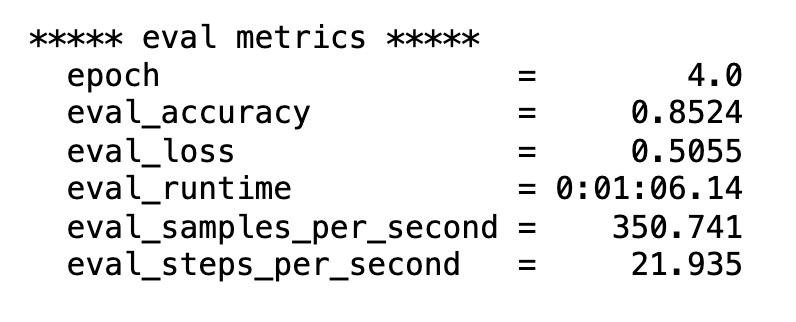